In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

In [2]:
breast_cancer = pd.read_csv('./data/breast_cancer_data/breast-cancer-diagnostic.shuf.lrn.csv', delimiter=',')
breast_cancer_test = pd.read_csv('./data/breast_cancer_data/breast-cancer-diagnostic.shuf.tes.csv', delimiter=',')

In [3]:
breast_cancer.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,radiusStdErr,textureStdErr,perimeterStdErr,areaStdErr,smoothnessStdErr,compactnessStdErr,concavityStdErr,concavePointsStdErr,symmetryStdErr,fractalDimensionStdErr,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,0.4250,0.8098,2.563,35.74,0.006351,0.02679,0.03119,0.01342,0.02062,0.002695,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,1.3090,2.407,39.06,0.004426,0.02675,0.03437,0.01343,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.1966,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,0.4041,0.5503,2.547,48.90,0.004821,0.01659,0.02408,0.01143,0.01275,0.002451,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.1776,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,0.1816,0.05723,0.3117,0.8155,1.972,27.94,0.005217,0.01515,0.01678,0.01268,0.01669,0.002330,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.1374,0.2723,0.07071


This data set has information about cancer patients. We want to predict based on different characteristic if a patient has a "recurrence-events" or "no-recurrence-events", which translates into the target variables being True or False.
Binary classification

In [4]:
breast_cancer.shape

(285, 32)

#### Check for missing values in training and test file

In [5]:
na_train=breast_cancer.isnull().sum().sum()
na_test=breast_cancer_test.isnull().sum().sum()

print(f'There are {na_train} missing values in the train data set.')
print(f'There are {na_test} missing values in the test data set.')


There are 0 missing values in the train data set.
There are 0 missing values in the test data set.


In [6]:
breast_cancer.columns

Index(['ID', 'class', 'radiusMean', ' textureMean', ' perimeterMean',
       ' areaMean', ' smoothnessMean', ' compactnessMean', ' concavityMean',
       ' concavePointsMean', ' symmetryMean', ' fractalDimensionMean',
       ' radiusStdErr', ' textureStdErr', ' perimeterStdErr', ' areaStdErr',
       ' smoothnessStdErr', ' compactnessStdErr', ' concavityStdErr',
       ' concavePointsStdErr', ' symmetryStdErr', ' fractalDimensionStdErr',
       ' radiusWorst', ' textureWorst', ' perimeterWorst', ' areaWorst',
       ' smoothnessWorst', ' compactnessWorst', ' concavityWorst',
       ' concavePointsWorst', ' symmetryWorst', ' fractalDimensionWorst'],
      dtype='object')

Some column names have empty spaces

In [7]:
# Remove empty spaces from columns' names
breast_cancer.columns = breast_cancer.columns.str.replace(' ', '')

In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      285 non-null    int64  
 1   class                   285 non-null    bool   
 2   radiusMean              285 non-null    float64
 3   textureMean             285 non-null    float64
 4   perimeterMean           285 non-null    float64
 5   areaMean                285 non-null    float64
 6   smoothnessMean          285 non-null    float64
 7   compactnessMean         285 non-null    float64
 8   concavityMean           285 non-null    float64
 9   concavePointsMean       285 non-null    float64
 10  symmetryMean            285 non-null    float64
 11  fractalDimensionMean    285 non-null    float64
 12  radiusStdErr            285 non-null    float64
 13  textureStdErr           285 non-null    float64
 14  perimeterStdErr         285 non-null    fl

In [ ]:
breast_cancer.dtypes.unique()

array([dtype('int64'), dtype('bool'), dtype('float64')], dtype=object)

In [ ]:
breast_cancer.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
ID,285.0,25755168.36,1.073900e+08,8913.00,868871.00,905189.00,8812816.00,9.112962e+08
radiusMean,285.0,13.95,3.490000e+00,7.69,11.51,13.14,15.50,2.573000e+01
textureMean,285.0,19.38,4.280000e+00,9.71,16.39,18.90,21.84,3.928000e+01
perimeterMean,285.0,90.76,2.406000e+01,47.98,73.99,85.24,102.80,1.742000e+02
areaMean,285.0,637.43,3.401700e+02,170.40,406.30,530.60,747.20,2.010000e+03
smoothnessMean,285.0,0.10,1.000000e-02,0.06,0.09,0.10,0.11,1.600000e-01
compactnessMean,285.0,0.10,6.000000e-02,0.02,0.07,0.09,0.13,3.500000e-01
concavityMean,285.0,0.09,8.000000e-02,0.00,0.03,0.05,0.12,4.300000e-01
concavePointsMean,285.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,1.900000e-01
symmetryMean,285.0,0.18,3.000000e-02,0.11,0.16,0.18,0.19,3.000000e-01


We don't have any missing values and our variables are mostly of type float (Ratio), with only the target variable being a boolean (Categorical - Binary) and the ID being an integer (Nominal) <br />
We can also see that the variables are in different scales, for example, the mean of 'areaMean' is around 637 and the mean of ConcavityMean is around 0.085, which may need to be fixed on the preprocessing

In [11]:
breast_cancer['class'].value_counts()

class
0    188
1     97
Name: count, dtype: int64

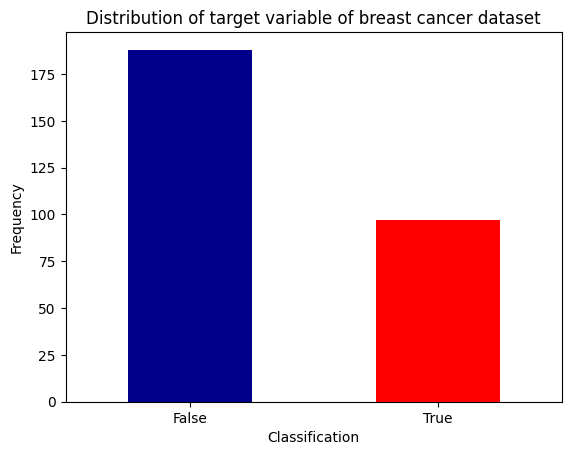

In [9]:
# Plot target variable
breast_cancer['class'].value_counts().plot(kind='bar', color=['darkblue', 'red', 'skyblue'])
# Adding title and labels
plt.title("Distribution of target variable of breast cancer dataset")
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 

# Show the plot
plt.show()

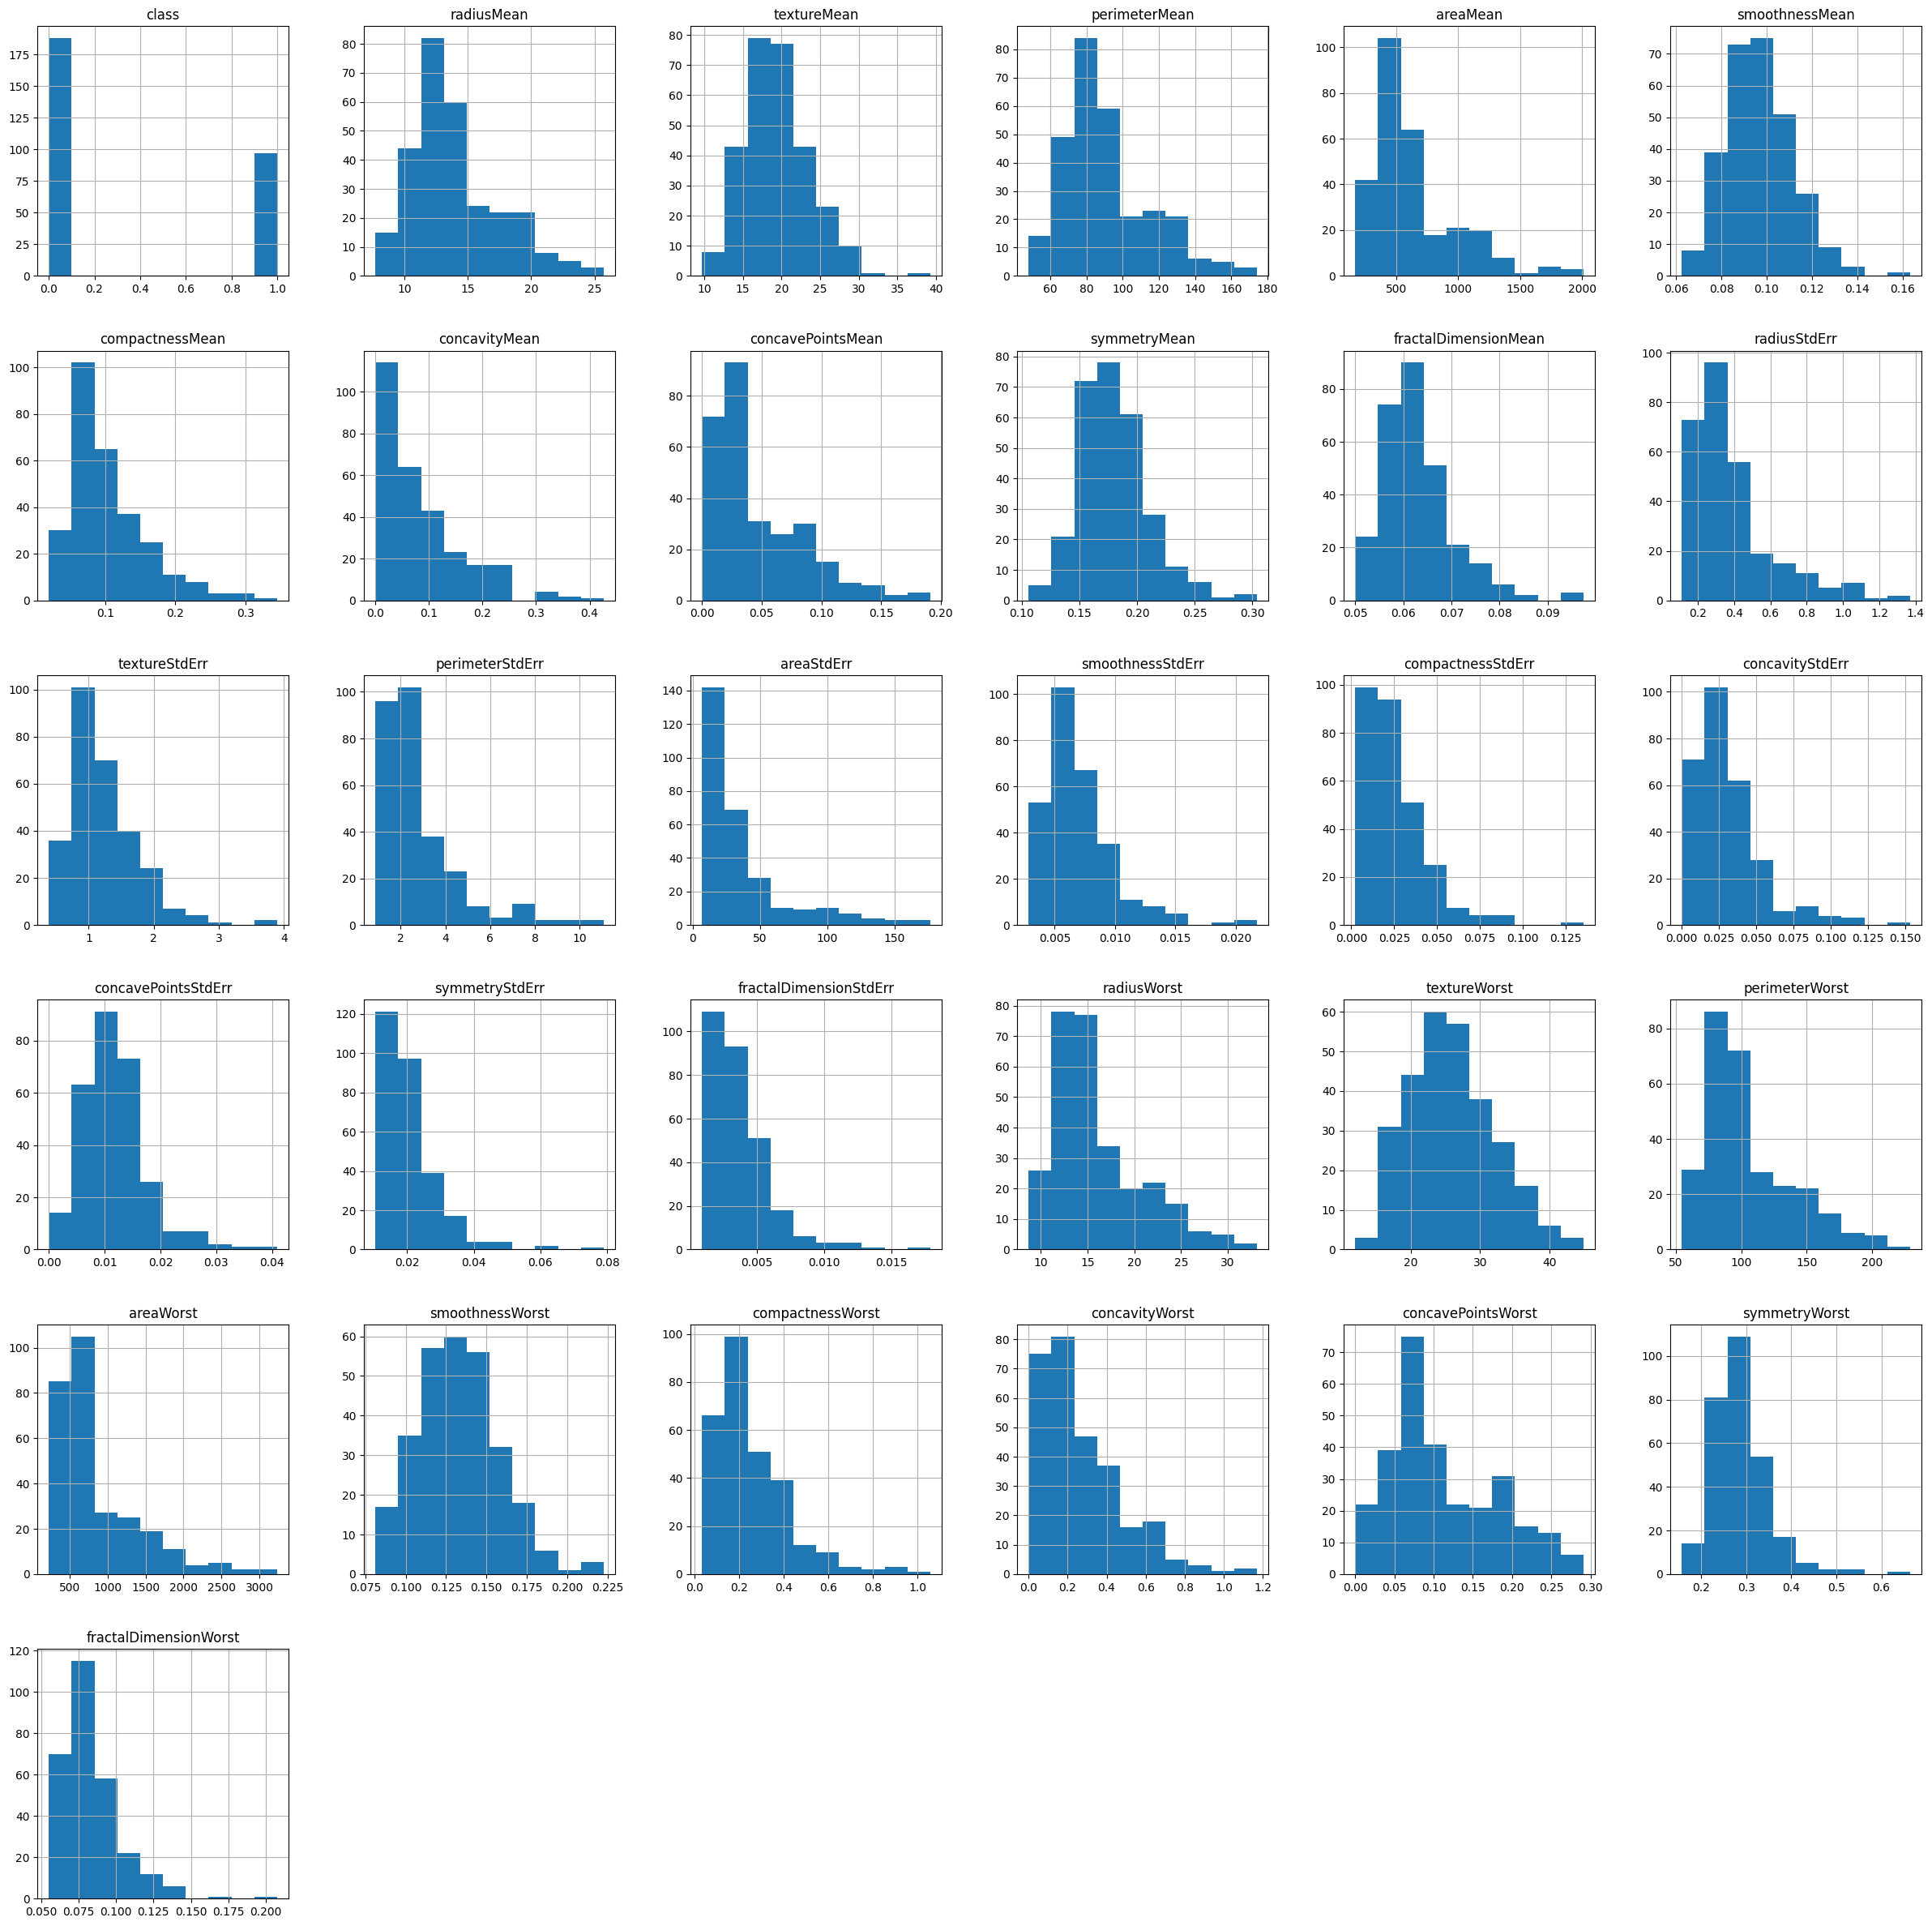

In [13]:
breast_cancer.hist(figsize=(30, 30))
plt.show()

Some of the distributions are rigth skewed, for example, symmetryStdErr or concavityWorst, which implies that we will need to apply some scaling technique.

Firstly, we replace the values of our target variable to be 1, when Class=True, and 0, when Class=False.

In [8]:
breast_cancer['class'].replace({True: 1, False: 0}, inplace=True)

C:\Users\marga\AppData\Local\Temp\ipykernel_23992\4141336050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  breast_cancer['class'].replace({True: 1, False: 0}, inplace=True)
C:\Users\marga\AppData\Local\Temp\ipykernel_23992\4141336050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast_c

In [9]:
breast_cancer.set_index('ID', inplace=True)

<Axes: >

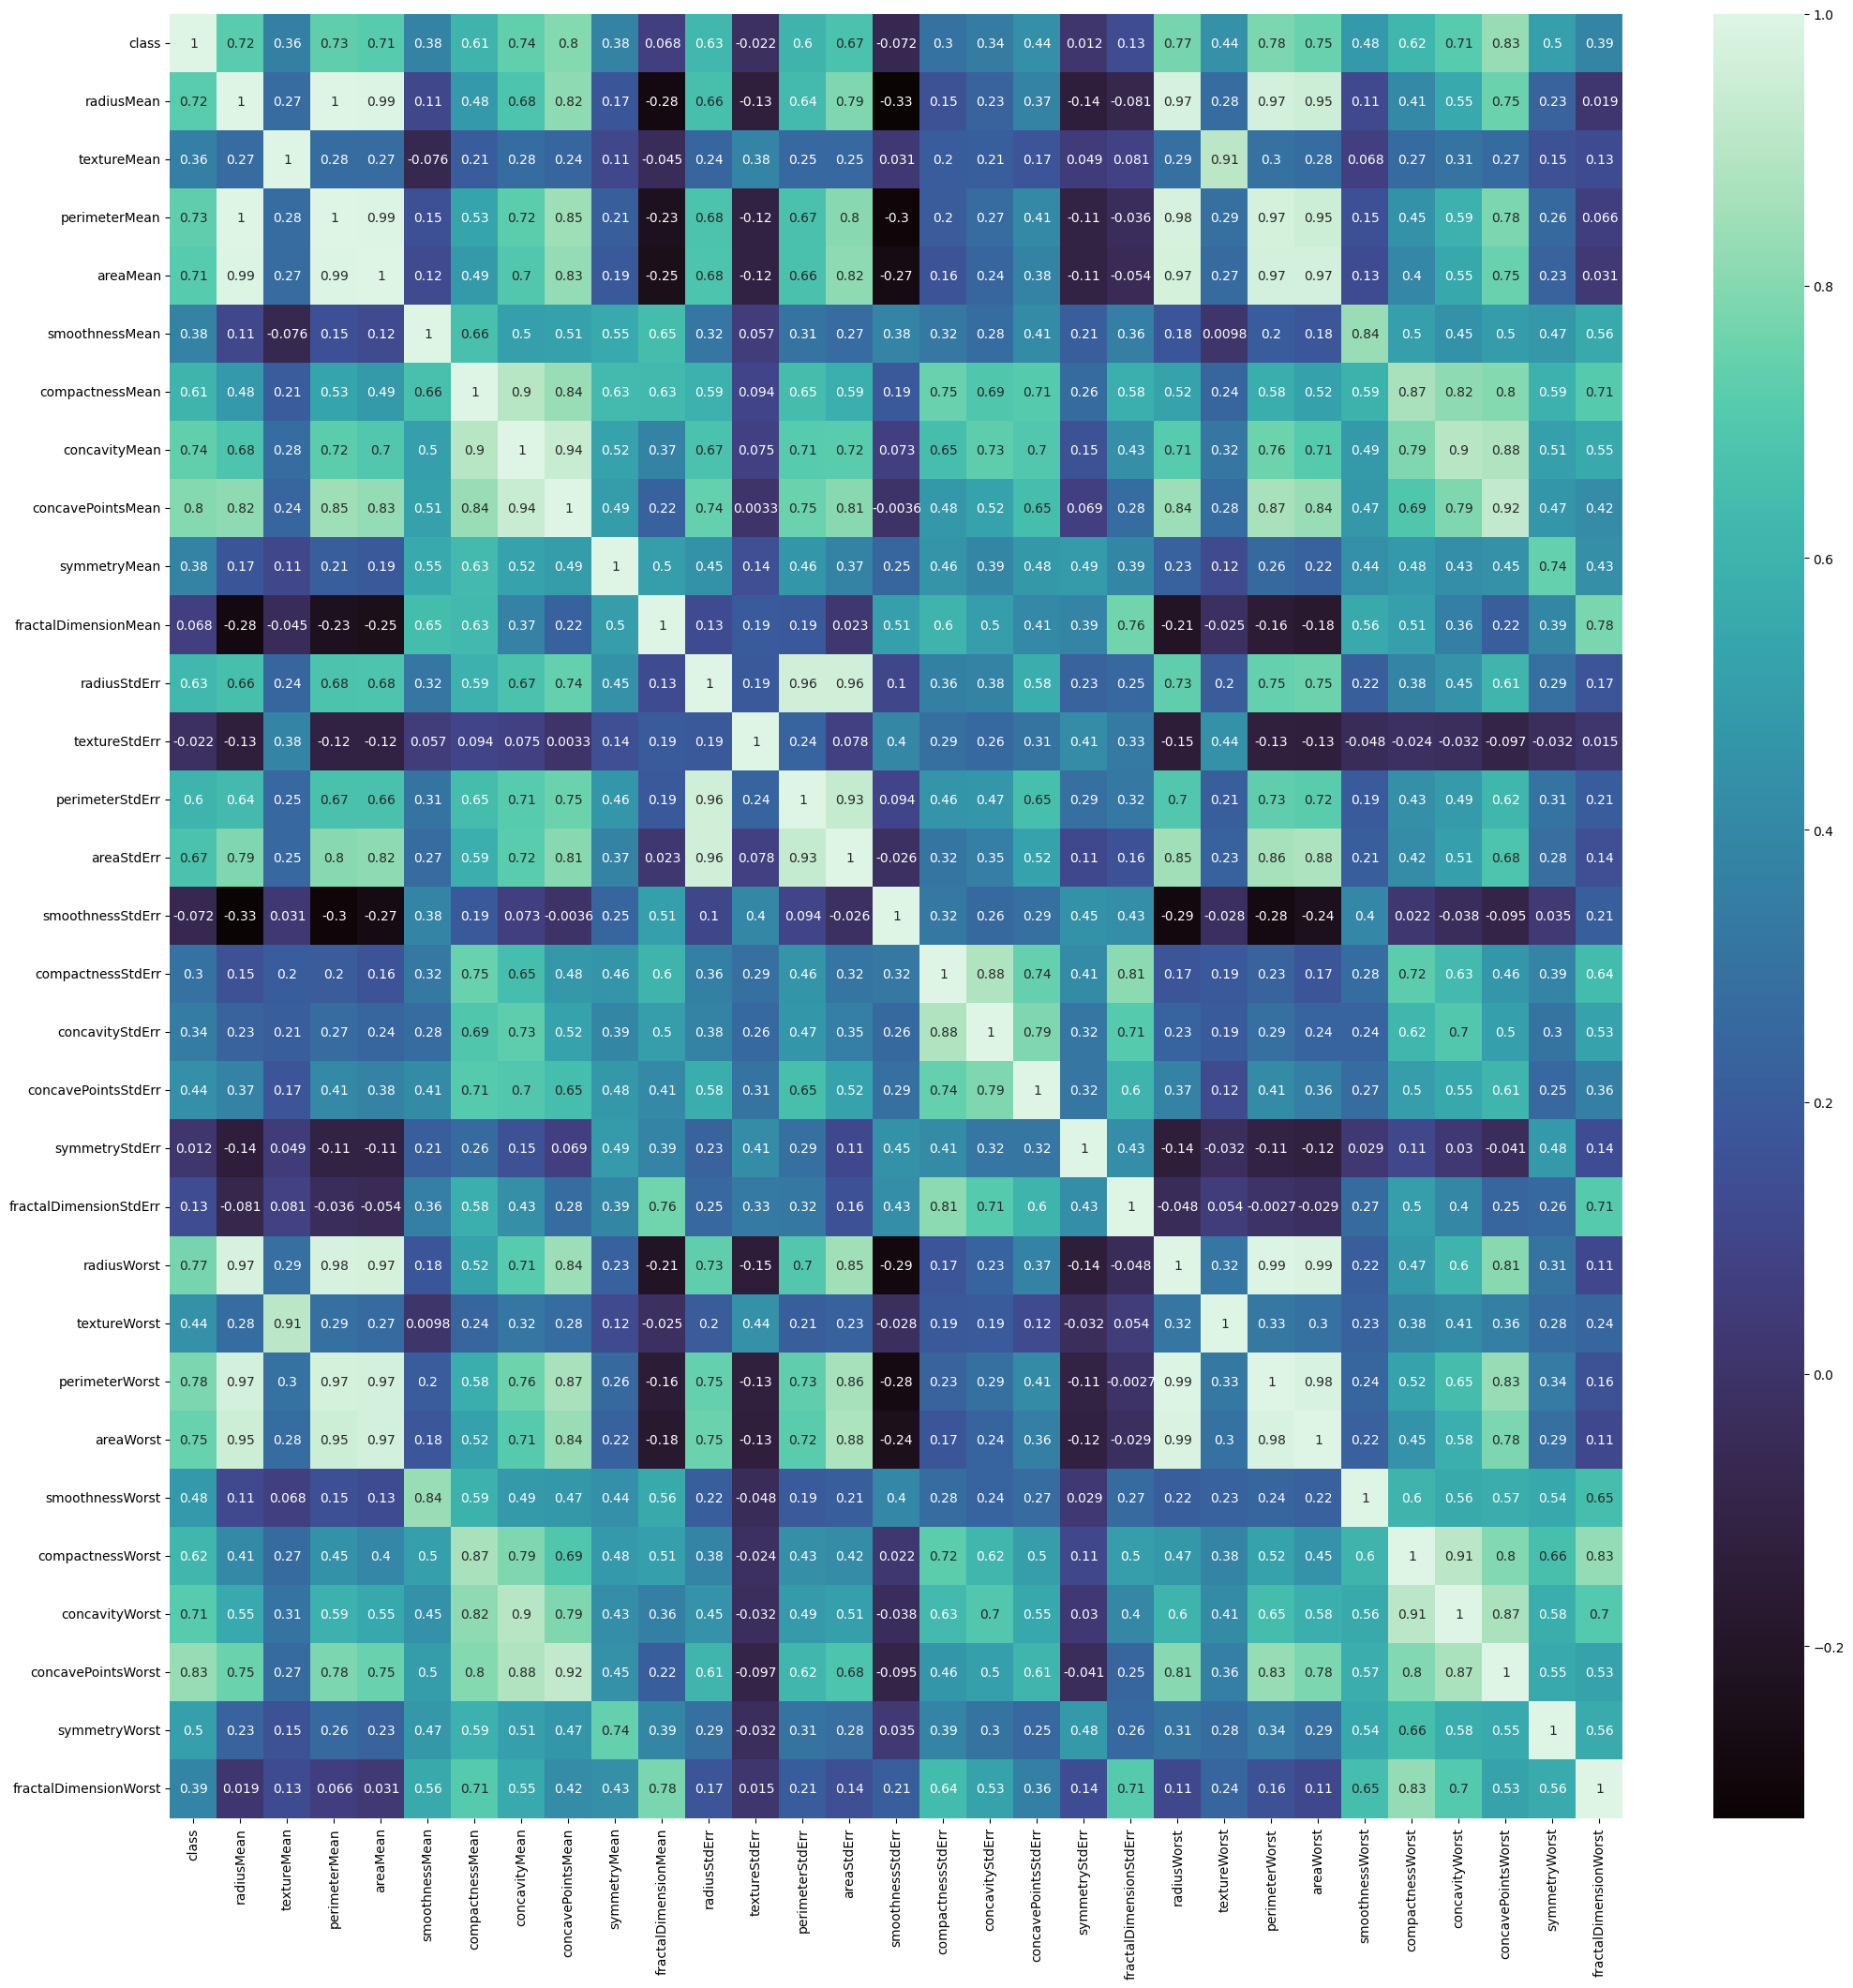

In [10]:
#Check correlations
correlation = breast_cancer.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

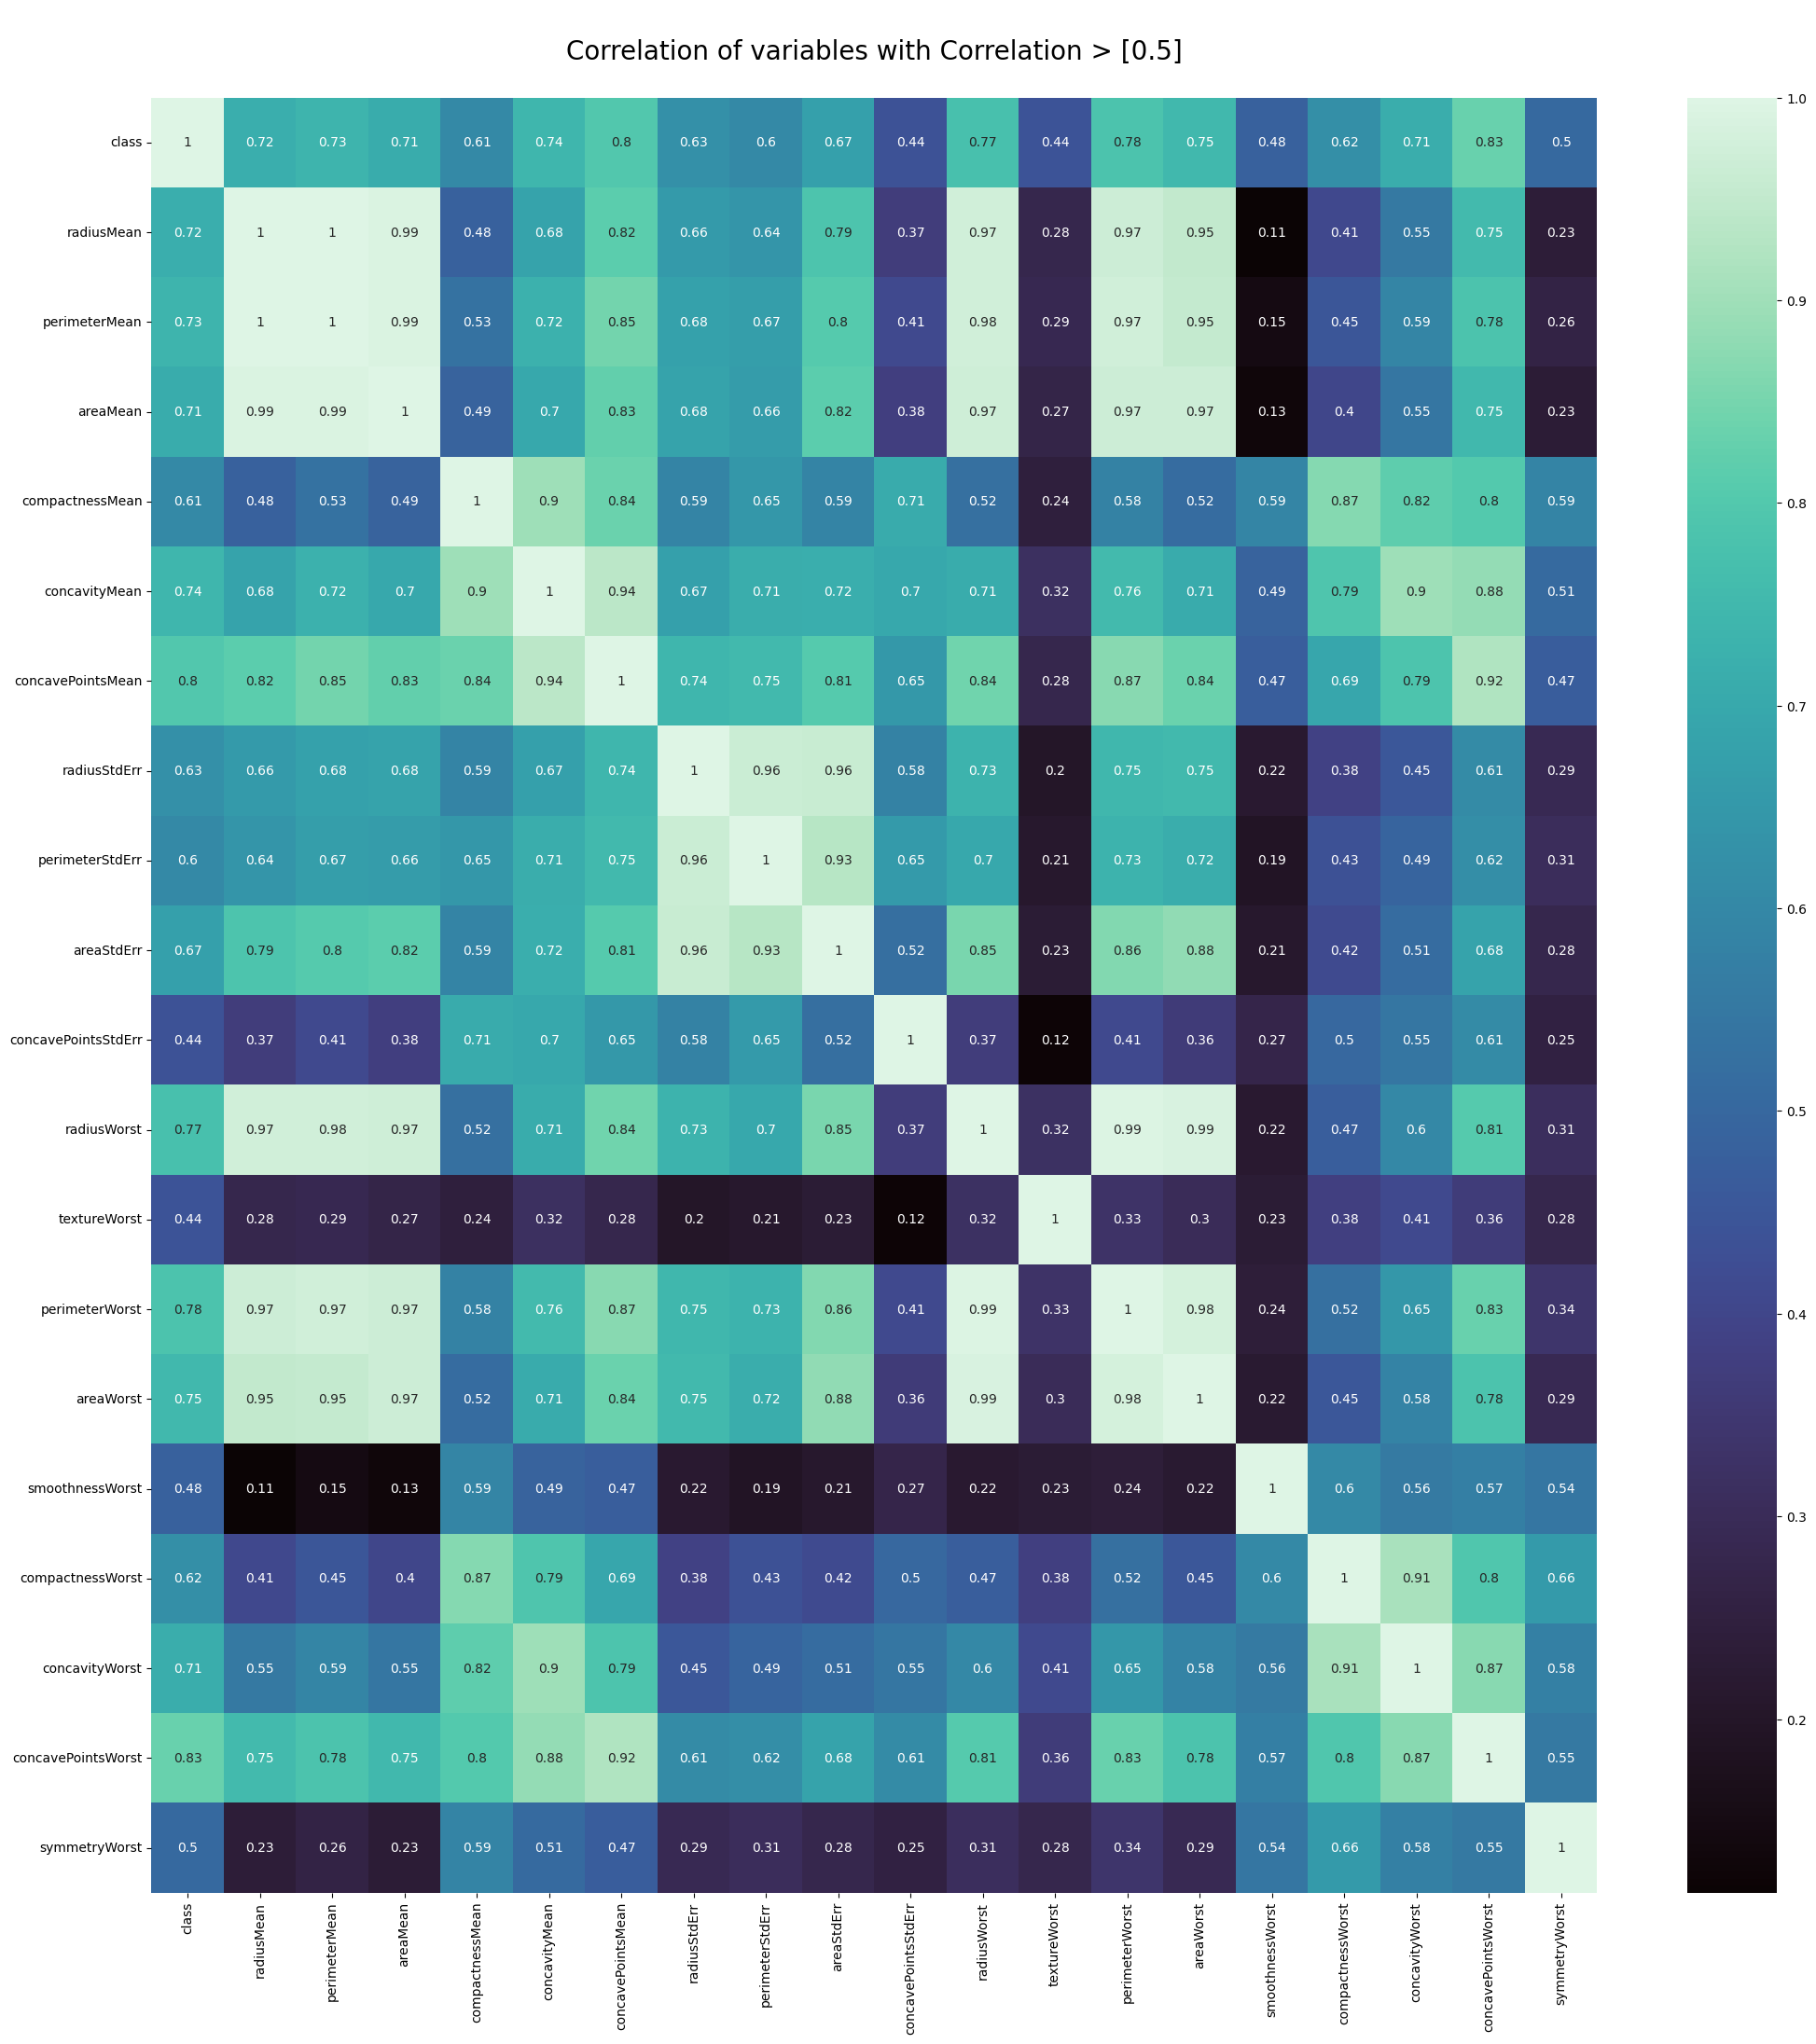

In [11]:
# Correlations of variables with corr >0.4
threshold = 0.4
filter = np.abs(correlation["class"] >= threshold)
correlation_features = correlation.columns[filter].tolist()
plt.figure(figsize=(25,25))
sns.heatmap(breast_cancer[correlation_features].corr(), annot=True, cmap='mako')
plt.title("\nCorrelation of variables with Correlation > [0.5]\n",fontsize=20)
plt.show()

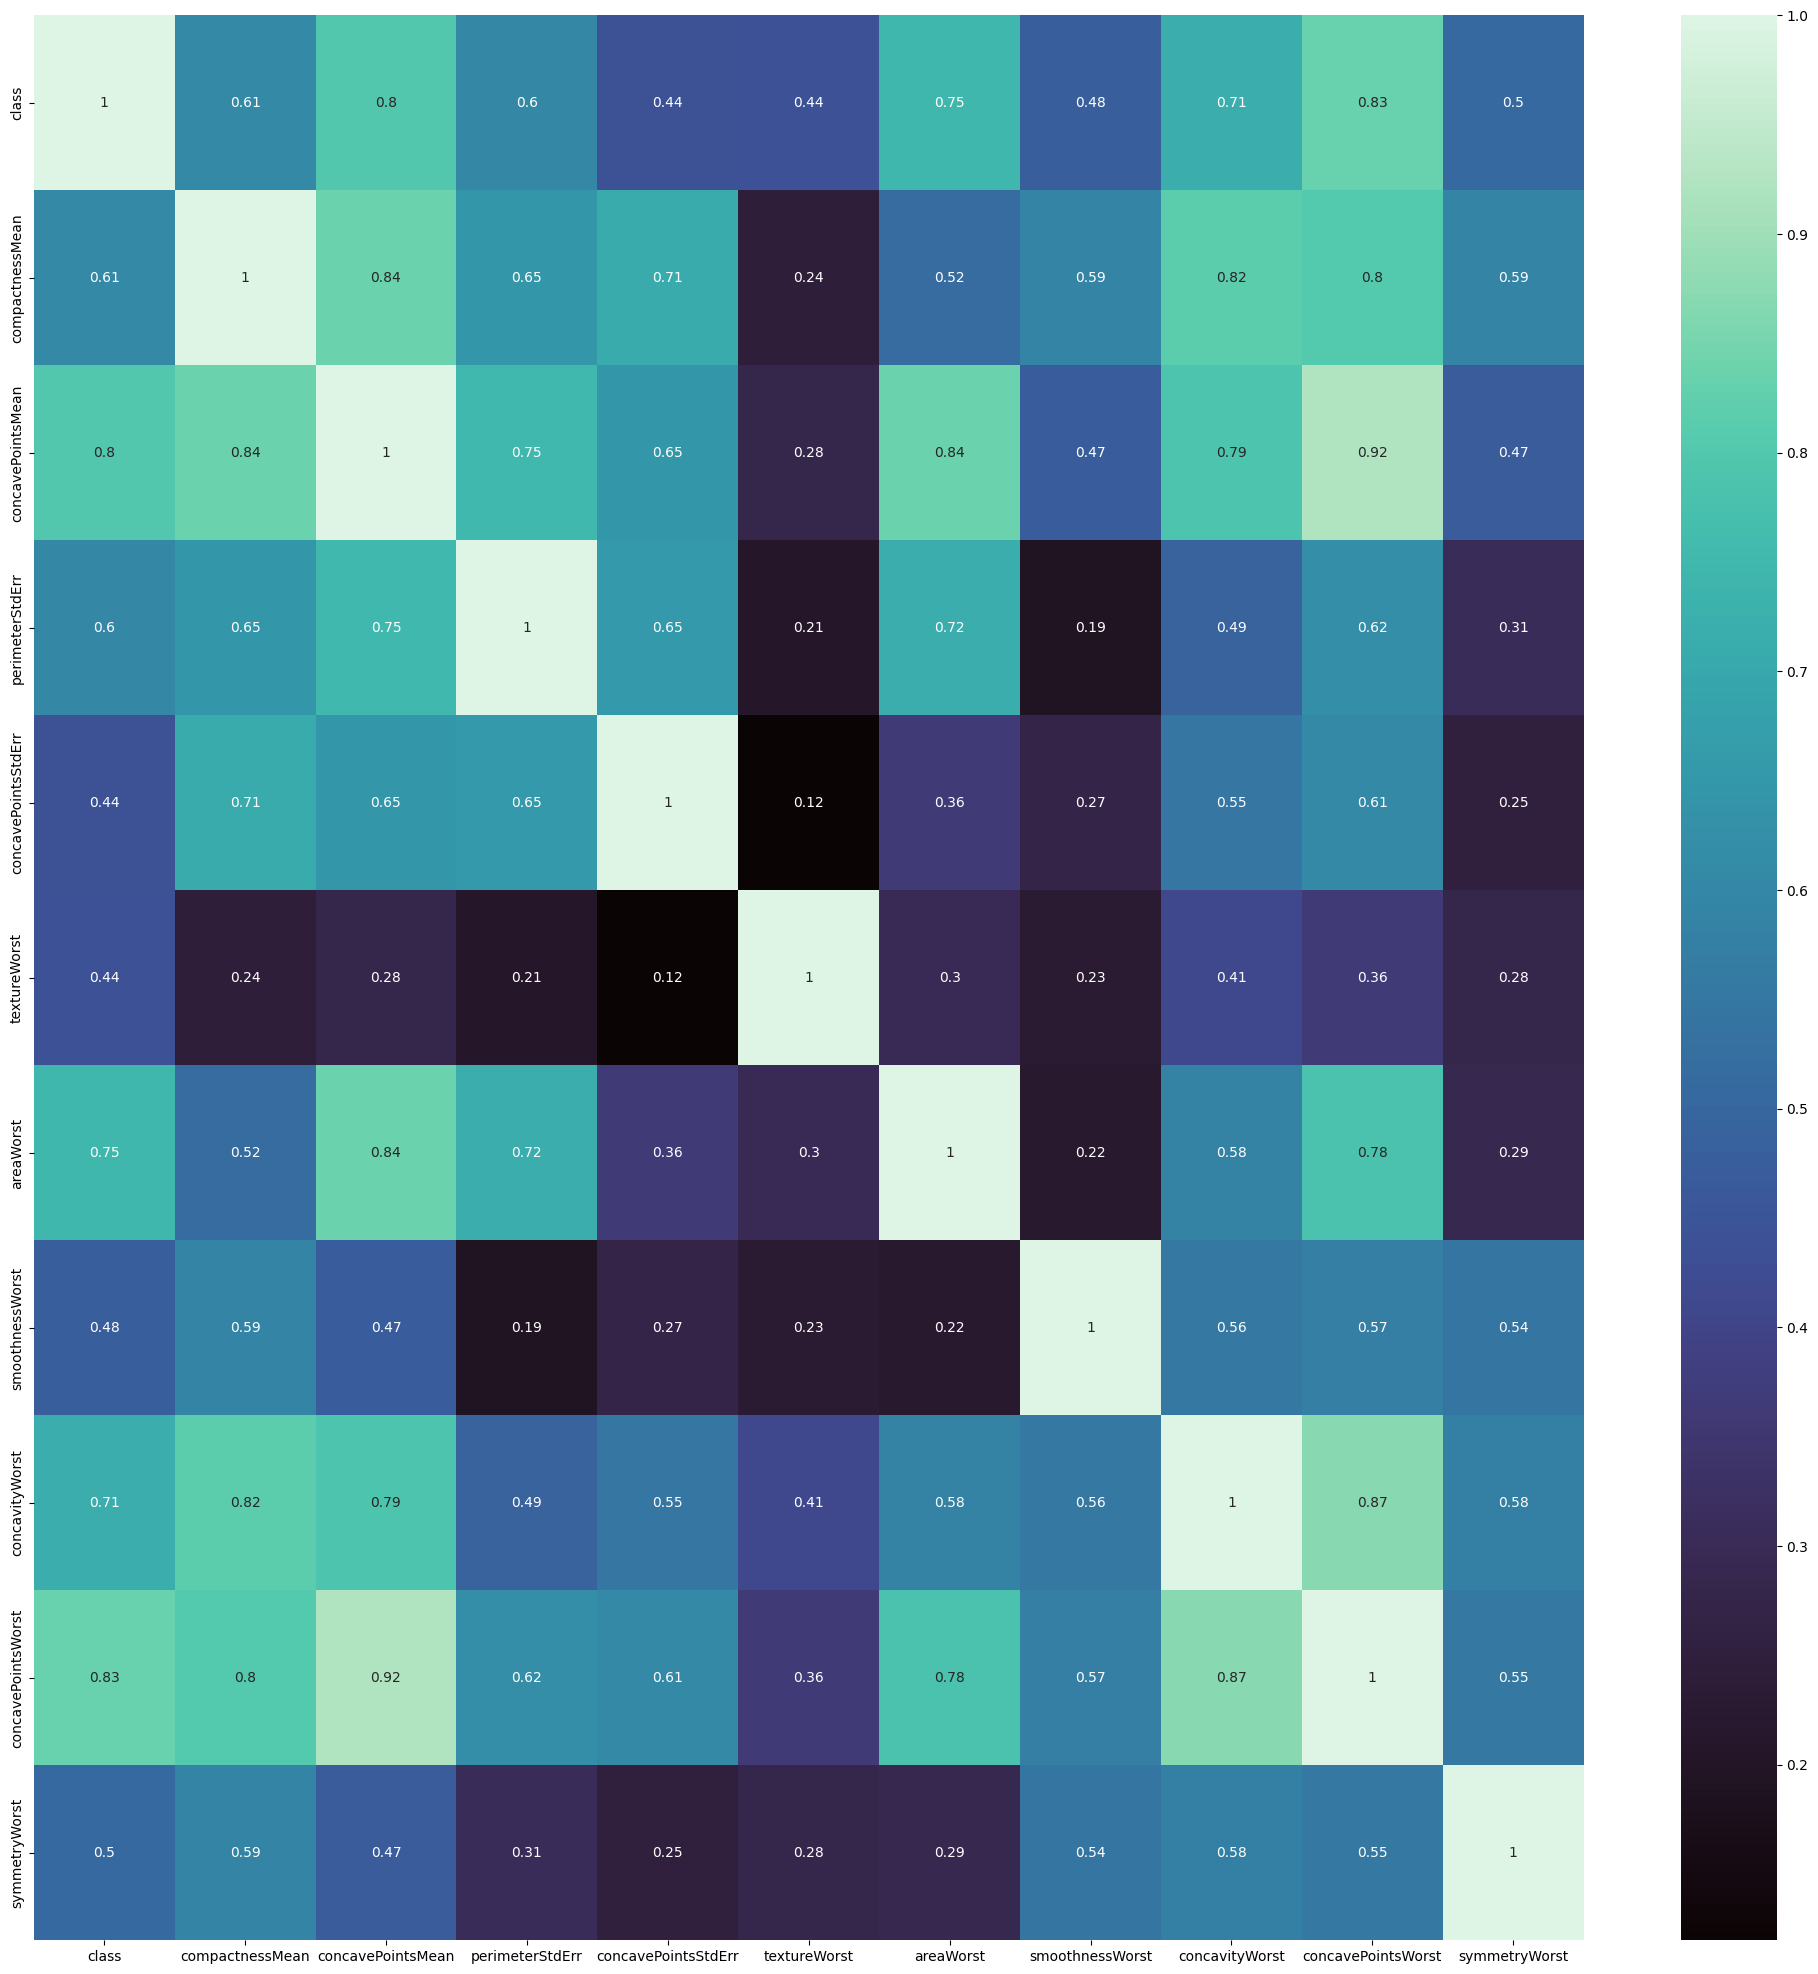

In [12]:
plt.figure(figsize=(25,25))
feat_selection=breast_cancer[correlation_features].drop(columns=['radiusMean', 'perimeterMean','radiusWorst','areaMean' ,'radiusStdErr','perimeterWorst','concavityMean','areaStdErr','compactnessWorst'])#, 'concavePointsWorst'])
sns.heatmap(feat_selection.corr(), annot=True, cmap='mako')

plt.show()

In [ ]:
breast_cancer.drop(columns=['class',
                            'areaMean', 
                            'areaWorst','perimeterMean', 
                            'areaStdErr', 'perimeterWorst',
                            'radiusMean','textureMean', 
                            'radiusWorst', 'textureWorst',
                            'perimeterStdErr', 'textureStdErr']).boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
breast_cancer[['perimeterStdErr', 'textureStdErr']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
breast_cancer[['radiusMean','textureMean', 'radiusWorst', 'textureWorst']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
breast_cancer[['perimeterMean', 'areaStdErr', 'perimeterWorst']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
breast_cancer[['areaMean', 'areaWorst']].boxplot(figsize=(10, 6))
plt.title("Boxplots for All Variables")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Divide train and test

In [13]:
X = breast_cancer.drop(['class'], axis=1)
y = breast_cancer['class']

In [14]:
RANDOM_SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [15]:
#Feat Selection
X_feature_selection = feat_selection.drop(['class'], axis=1)
y_feature_selection = feat_selection['class']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_feature_selection, y_feature_selection, test_size=0.2, random_state=RANDOM_SEED)

# Models

In [ ]:
model_mlp = MLPClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_mlp.fit(X_train, y_train)
end_time = time.time()

y_pred = model_mlp.predict(X_test)

training_time_mlp = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time MLP: {training_time_mlp:.4f} seconds")


f1_test: 0.9130
Accuracy: 0.9298
Training Time MLP: 0.2245 seconds


In [21]:
model_knn = KNeighborsClassifier()

start_time = time.time()
model_knn.fit(X_train, y_train)
end_time = time.time()

y_pred = model_knn.predict(X_test)

training_time_knn = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time KNN: {training_time_knn:.4f} seconds")


f1_test: 0.9130
Accuracy: 0.9298
Training Time KNN: 0.0033 seconds


In [22]:
model_rf = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_rf.fit(X_train, y_train)
end_time = time.time()

y_pred = model_rf.predict(X_test)

training_time_rf = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time RF: {training_time_rf:.4f} seconds")


f1_test: 0.9787
Accuracy: 0.9825
Training Time RF: 0.1738 seconds


In [ ]:
X_train.hist(figsize=(30, 30))
plt.show()

## Compare Holdout (Train/Test) to CV

In [ ]:
# CV KNN
cv_knn = cross_val_score(model_knn, X_train, y_train, cv=5)
cv_knn

array([0.93478261, 0.93478261, 0.91304348, 0.93333333, 0.93333333])

In [57]:
# CV MLP
cv_mlp = cross_val_score(model_mlp, X_train, y_train, cv=5)
cv_mlp

array([0.89130435, 0.32608696, 0.80434783, 0.77777778, 0.88888889])

In [58]:
# CV RF
cv_rf = cross_val_score(model_rf, X_train, y_train, cv=5)
cv_rf

array([0.95652174, 0.93478261, 0.91304348, 0.97777778, 0.95555556])

## Feature Selection based on correlation with Target variable

In [16]:
model_mlp_fs = MLPClassifier(max_iter=500,random_state=RANDOM_SEED)

start_time = time.time()
model_mlp_fs.fit(X_train_fs, y_train)
end_time = time.time()

y_pred = model_mlp_fs.predict(X_test_fs)

training_time_mlp_fs = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time MLP: {training_time_mlp_fs:.4f} seconds")

f1_test: 0.8372
Accuracy: 0.8772
Training Time MLP: 0.0791 seconds


In [17]:
model_knn_fs = KNeighborsClassifier()

start_time = time.time()
model_knn_fs.fit(X_train_fs, y_train)
end_time = time.time()

y_pred = model_knn_fs.predict(X_test_fs)

training_time_knn_fs = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time MLP: {training_time_knn_fs:.4f} seconds")

f1_test: 0.9362
Accuracy: 0.9474
Training Time MLP: 0.0051 seconds


In [18]:
model_rf_fs = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_rf_fs.fit(X_train_fs, y_train)
end_time = time.time()

y_pred = model_rf_fs.predict(X_test_fs)

training_time_rf_fs = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time MLP: {training_time_rf_fs:.4f} seconds")

f1_test: 0.9565
Accuracy: 0.9649
Training Time MLP: 0.2099 seconds


#### Try different Scalers

In [20]:
scaler_ss = StandardScaler()
X_train_scaled = scaler_ss.fit_transform(X_train)

X_test_scaled=scaler_ss.transform(X_test)

In [ ]:
#Check distribution of variables after scaling
pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index).hist(figsize=(30, 30))
plt.show()

In [ ]:
model_ss_mlp = MLPClassifier(max_iter=500,random_state=RANDOM_SEED)

start_time = time.time()
model_ss_mlp.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = model_ss_mlp.predict(X_test_scaled)

training_time_ss_mlp = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_ss_mlp:.4f} seconds")

f1_test: 1.0000
Accuracy: 1.0000
Training Time: 0.4513 seconds


In [24]:
model_ss_knn = KNeighborsClassifier()

start_time = time.time()
model_ss_knn.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = model_ss_knn.predict(X_test_scaled)

training_time_ss_knn = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_ss_knn:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.0008 seconds


In [ ]:
model_ss_rf = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_ss_rf.fit(X_train_scaled, y_train)
end_time = time.time()

y_pred = model_ss_rf.predict(X_test_scaled)

training_time_ss_rf = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_ss_rf:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825


In [26]:
scaler_rb = RobustScaler()
X_train_robust_scaled = scaler_rb.fit_transform(X_train)

X_test_robust_scaled=scaler_rb.transform(X_test )

In [27]:
model_rs_rf = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_rs_rf.fit(X_train_robust_scaled, y_train)
end_time = time.time()

y_pred = model_rs_rf.predict(X_test_robust_scaled)

training_time_rs_rf = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_rs_rf:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.1561 seconds


In [28]:
model_rs_knn = KNeighborsClassifier()

start_time = time.time()
model_rs_knn.fit(X_train_robust_scaled, y_train)
end_time = time.time()

y_pred = model_rs_knn.predict(X_test_robust_scaled)

training_time_ss_rf = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_ss_rf:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.0006 seconds


In [30]:
model_rs_mlp = MLPClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_rs_mlp.fit(X_train_robust_scaled, y_train)
end_time = time.time()

y_pred = model_rs_mlp.predict(X_test_robust_scaled)

training_time_rs_mlp = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_rs_mlp:.4f} seconds")

f1_test: 1.0000
Accuracy: 1.0000
Training Time: 0.2790 seconds


c:\Users\marga\Desktop\Faculdade\ML\git\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### MinMaxScaler

In [32]:
scaler_mm = MinMaxScaler()
X_train_minmax = scaler_mm.fit_transform(X_train)
X_test_minmax=scaler_mm.transform(X_test )

In [ ]:
pd.DataFrame(X_train_minmax, columns=X_train.columns,index=X_train.index).hist(figsize=(30, 30))
plt.show()

In [34]:
model_mm_rf = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_mm_rf.fit(X_train_minmax, y_train)
end_time = time.time()

y_pred = model_mm_rf.predict(X_test_minmax)

training_time_mm_rf = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_mm_rf:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.1594 seconds


In [35]:
model_mm_knn = KNeighborsClassifier()

start_time = time.time()
model_mm_knn.fit(X_train_minmax, y_train)
end_time = time.time()

y_pred = model_mm_knn.predict(X_test_minmax)

training_time_mm_knn = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_mm_knn:.4f} seconds")

f1_test: 1.0000
Accuracy: 1.0000
Training Time: 0.0011 seconds


In [36]:
model_mm_mlp = MLPClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_mm_mlp.fit(X_train_minmax, y_train)
end_time = time.time()

y_pred = model_mm_mlp.predict(X_test_minmax)

training_time_mm_mlp= end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_mm_mlp:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.2676 seconds


c:\Users\marga\Desktop\Faculdade\ML\git\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### PowerTransform

In [38]:

X_train_powertransform = X_train.copy()
X_test_powertransform = X_test.copy()
pt = PowerTransformer()

X_train_powertransform=pd.DataFrame(pt.fit_transform(X_train_powertransform[X_train_powertransform.columns]), columns=X_train_powertransform.columns, index=X_train_powertransform.index)
X_test_powertransform=pd.DataFrame(pt.transform(X_test_powertransform[X_test_powertransform.columns]), columns=X_test_powertransform.columns, index=X_test_powertransform.index)
#X_train_powertransform[X_train_powertransform.columns]=pd.DataFrame(pt.fit_transform(X_train_powertransform[X_train_powertransform.columns]), columns=X_train_powertransform.columns, index=X_train_powertransform.index)
#X_test_powertransform[X_test_powertransform.columns]=pd.DataFrame(pt.transform(X_test_powertransform[X_test_powertransform.columns]), columns=X_test_powertransform.columns, index=X_test_powertransform.index)



In [ ]:
X_train_powertransform.hist(figsize=(30, 30))
plt.show()

Power transform seams to made the distributions look more similiar to a normal one,  which was something all other scalers didn't

In [39]:
model_pt_rf = RandomForestClassifier(random_state=RANDOM_SEED)

start_time = time.time()
model_pt_rf.fit(X_train_powertransform, y_train)
end_time = time.time()

y_pred = model_pt_rf.predict(X_test_powertransform)

training_time_pt_rf = end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_pt_rf:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.1878 seconds


In [40]:
model_pt_knn = KNeighborsClassifier()

start_time = time.time()
model_pt_knn.fit(X_train_powertransform, y_train)
end_time = time.time()

y_pred = model_pt_knn.predict(X_test_powertransform)

training_time_pt_knn= end_time - start_time
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_pt_knn:.4f} seconds")

f1_test: 0.9787
Accuracy: 0.9825
Training Time: 0.0027 seconds


In [41]:
model_pt_mlp = MLPClassifier(max_iter=500,random_state=RANDOM_SEED)

start_time = time.time()
model_pt_mlp.fit(X_train_powertransform, y_train)
end_time = time.time()

y_pred = model_pt_mlp.predict(X_test_powertransform)

training_time_pt_mlp = end_time - start_time
f1= f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_pt_mlp:.4f} seconds")

f1_test: 0.9796
Accuracy: 0.9825
Training Time: 0.3906 seconds


### Hyperparameter Optimization with GridSearchCV

In [21]:
model_mlp_gs = MLPClassifier(random_state=RANDOM_SEED)


param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (100,100,100)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500, 700, 1000] #100, 200,
}

# Perform GridSearchCV
grid_search_mlp = GridSearchCV(estimator=model_mlp_gs, param_grid=param_grid_mlp, cv=5, scoring='f1', n_jobs=-1, verbose=2)
start_time = time.time()
grid_search_mlp.fit(X_train_scaled, y_train)
end_time = time.time()

training_time_mlp_gs = end_time - start_time

# Display the best parameters and the corresponding score
print("Best parameters found: ", grid_search_mlp.best_params_)
print("Best cross-validation score: ", grid_search_mlp.best_score_)


Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters found:  {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
Best cross-validation score:  0.9719029374201789


In [22]:
best_model_mlp = grid_search_mlp.best_estimator_
y_pred = best_model_mlp.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_mlp_gs:.4f} seconds")

f1_test: 1.0000
Accuracy: 1.0000
Training Time: 438.6960 seconds


In [ ]:
model_rf_gs = RandomForestClassifier(random_state=RANDOM_SEED)

param_grid_rf = {
    "n_estimators": [100, 200, 500],
    "max_features": ['sqrt', 0.2, 0.5],
    "max_depth": [10, 20, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "bootstrap": [True, False],
    "class_weight": [None, 'balanced']
}

grid_search_rf = GridSearchCV(estimator=model_rf_gs, param_grid=param_grid_rf,  scoring="f1", cv=3, verbose=3, n_jobs=-1)
start_time = time.time()
grid_search_rf.fit(X_train_scaled, y_train)
end_time = time.time()

training_time_rf_gs = end_time - start_time

print("Best parameters found: ", grid_search_mlp.best_params_)
print("Best cross-validation score: ", grid_search_mlp.best_score_)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [10, 20, 50],
                         'max_features': ['sqrt', 0.2, 0.5],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=3)

In [ ]:

best_model_rf = grid_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test_scaled)
print("\nClassification Report:\n")

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_rf_gs:.4f} seconds")


Classification Report:

f1_test: 0.9565
Accuracy: 0.9649


In [ ]:
model_knn_gs = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9,11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

# Perform GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn_gs, param_grid=param_grid_knn, cv=5, scoring='f1', n_jobs=-1, verbose=2)
start_time = time.time()
grid_search_knn.fit(X_train_scaled, y_train)
end_time = time.time()

training_time_knn_gs = end_time - start_time


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [ ]:
best_model_knn = grid_search_knn.best_estimator_
y_pred = best_model_knn.predict(X_test_scaled)
print("\nClassification Report:\n")

f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'f1_test: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f"Training Time: {training_time_knn_gs:.4f} seconds")


Classification Report:

f1_test: 0.9787
Accuracy: 0.9825


### Influence of a single hyperparameter

In [23]:
#KNN - different number of neighbors
k_values = [1, 5, 10, 50] #default=5

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    end_time = time.time()

    y_pred = knn.predict(X_test_scaled)

    training_time = end_time - start_time
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'f1_test for k={k}: {f1:.4f}')
    print(f'Accuracy for k={k}: {accuracy:.4f}')
    print(f"Training Time: {training_time:.4f} seconds")



f1_test for k=1: 0.9200
Accuracy for k=1: 0.9298
Training Time: 0.0000 seconds
f1_test for k=5: 0.9787
Accuracy for k=5: 0.9825
Training Time: 0.0000 seconds
f1_test for k=10: 0.9787
Accuracy for k=10: 0.9825
Training Time: 0.0000 seconds
f1_test for k=50: 0.9333
Accuracy for k=50: 0.9474
Training Time: 0.0000 seconds


In [ ]:
#RF - different number of trees
n_trees = [10, 50, 100, 1000]  # default=100

for n in n_trees:

    rf = RandomForestClassifier(n_estimators=n, random_state=RANDOM_SEED)
    start_time = time.time()
    rf.fit(X_train_scaled, y_train)
    end_time = time.time()
    y_pred = rf.predict(X_test_scaled)
    
    training_time = end_time - start_time
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'F1 Score for n_trees={n}: {f1:.4f}')
    print(f'Accuracy for n_trees={n}: {accuracy:.4f}')
    print(f"Training Time for n_trees={n}: {training_time:.4f} seconds")
    

F1 Score for n_trees=10: 0.9565
Accuracy for n_trees=10: 0.9649
Training Time: 0.0148 seconds
F1 Score for n_trees=50: 0.9787
Accuracy for n_trees=50: 0.9825
Training Time: 0.0457 seconds
F1 Score for n_trees=100: 0.9787
Accuracy for n_trees=100: 0.9825
Training Time: 0.0827 seconds
F1 Score for n_trees=1000: 0.9787
Accuracy for n_trees=1000: 0.9825
Training Time: 0.9460 seconds


In [ ]:
#MLP - Number of hidden layers
hidden_layer_configs = [(10,), (100,), (50, 50), (100, 50)] # default=(100,)

for config in hidden_layer_configs:
    mlp = MLPClassifier(hidden_layer_sizes=config, random_state=RANDOM_SEED, max_iter=500)
    start_time = time.time()
    mlp.fit(X_train_scaled, y_train)
    end_time = time.time()
    y_pred = mlp.predict(X_test_scaled)
    
    training_time = end_time - start_time
    f1 = f1_score(y_test, y_pred) 
    accuracy = accuracy_score(y_test, y_pred)

    print(f'F1 Score for hidden layers {config}: {f1:.4f}')
    print(f'Accuracy for hidden layers {config}: {accuracy:.4f}')
    print(f"Training Time for hidden layers {config}: {training_time:.4f} seconds")

F1 Score for hidden layers (10,): 1.0000
Accuracy for hidden layers (10,): 1.0000
F1 Score for hidden layers (100,): 1.0000
Accuracy for hidden layers (100,): 1.0000
F1 Score for hidden layers (50, 50): 1.0000
Accuracy for hidden layers (50, 50): 1.0000
F1 Score for hidden layers (100, 50): 0.9796
Accuracy for hidden layers (100, 50): 0.9825


# Get preditions for test 

In [ ]:
#breast_cancer_test
breast_cancer_test_1=breast_cancer_test.set_index('ID')
breast_cancer_test_1.columns = breast_cancer_test_1.columns.str.replace(' ', '')
#breast_cancer_test_1=breast_cancer_test_1[correlation_features].drop(columns=['radiusMean', 'perimeterMean','radiusWorst','areaMean' ,'radiusStdErr','perimeterWorst','concavityMean','areaStdErr','compactnessWorst'])#, 'concavePointsWorst'])


#breast_cancer_test_scale=pd.DataFrame(pt.transform(breast_cancer_test_1), columns=breast_cancer_test_1.columns, index=breast_cancer_test_1.index)
breast_cancer_test_scale=scaler_ss.transform(breast_cancer_test_1)
#breast_cancer_test_scale=scaler_rb.transform(breast_cancer_test_1)


In [52]:
breast_cancer_test_1

,compactnessMean,concavePointsMean,perimeterStdErr,concavePointsStdErr,textureWorst,areaWorst,smoothnessWorst,concavityWorst,concavePointsWorst,symmetryWorst
ID,,,,,,,,,,
9012568,0.06934,0.02657,1.338,0.009155,15.73,819.1,0.1126,0.1362,0.08178,0.2487
844981,0.19320,0.09353,2.406,0.012260,30.73,739.3,0.1703,0.5390,0.20600,0.4378
8813129,0.04994,0.02456,2.044,0.009057,23.60,708.8,0.1276,0.1786,0.09678,0.2506
881094802,0.11460,0.06597,3.767,0.039270,28.07,1021.0,0.1243,0.2803,0.10990,0.1603
88350402,0.06630,0.03731,1.996,0.011030,19.05,683.4,0.1278,0.1533,0.09222,0.2530
...,...,...,...,...,...,...,...,...,...,...
9010598,0.07952,0.01781,1.535,0.009997,25.99,579.7,0.1298,0.1255,0.08312,0.2744
862485,0.07525,0.03350,1.475,0.006884,17.16,512.5,0.1431,0.1922,0.08449,0.2772
8910506,0.06219,0.01615,1.546,0.006330,23.64,597.5,0.1256,0.1992,0.05780,0.3604


In [ ]:
#test_pred_y = model.predict(breast_cancer_test_scale)
test_pred_y = model_ss_mlp.predict(breast_cancer_test_scale)
#test_pred_y = model_mlp_fs.predict(breast_cancer_test_scale)


In [54]:
breast_cancer_test_1.reset_index(inplace=True)

In [55]:
test_pred_y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [56]:
output_file=breast_cancer_test_1[['ID']]
output_file['class']=test_pred_y

C:\Users\marga\AppData\Local\Temp\ipykernel_23412\4240257535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_file['class']=test_pred_y


In [57]:
output_file
output_file['class'].replace({1: 'true', 0: 'false'}, inplace=True)

C:\Users\marga\AppData\Local\Temp\ipykernel_23412\2854145332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  output_file['class'].replace({1: 'true', 0: 'false'}, inplace=True)
C:\Users\marga\AppData\Local\Temp\ipykernel_23412\2854145332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_file['class'].replace({1: 'true', 0: 'false'

In [58]:
output_file

,ID,class
0,9012568,false
1,844981,true
2,8813129,false
3,881094802,false
4,88350402,false
...,...,...
279,9010598,false
280,862485,false
281,8910506,false
282,8812877,true


In [59]:
output_file.to_csv('./data/breast_cancer_test2.csv', index=False)

- correlação para feat selection
- standard scaler + robust
- gridsearch